In [2]:
import matplotlib.pyplot as plt
import numpy as np

import ang_recoup as recoup

In [3]:
import importlib as il

In [46]:
from itertools import groupby

def split_text(s):
    for k, g in groupby(s, str.isalpha):
        yield ''.join(g)

In [4]:
# Plot styling
%matplotlib inline
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] =12

In [4]:
1/(170*1836) * 0.017 * 2.194746313632e5 * 4

0.047815823826405236

In [13]:
limits = {'S12':-0.4475768,
'P12':-0.3242741,
'P32':-0.3090996,
'D32':-0.3429597,
'D52':-0.3367089}

spec = {'s':0,'p':1,'d':2,'f':3,'g':4}
def fnu(e,lim):
    return np.sqrt(0.5/(lim-e))

In [12]:
CMperAU = 2.194746313632e5
eVperAU = 27.211386245988

egs = -0.67741295

def etoA(e):
    return 1/((e-egs)*CMperAU) * 1e8



def etoA_fromeo(e,eo):
    eau = e/CMperAU
    ee = eau+eo
    return etoA(ee)

def eAU_fromeo(e,eo):
    eau = e/CMperAU
    return eau+eo

def etoAU_fromA(e,egs):
    ecm = 1/(e*1e-8)
    return ecm/CMperAU+egs

In [4]:
def KfromLin(n,lin):
    if(len(lin)!=(n*(n+1)/2)): raise ValueError("Incorrect number of entries")
    Kmat = np.zeros((n,n))
    counter = 0
    for i in range(n):
        Kmat[i,i:] = lin[counter:counter+(n-i)]
        Kmat[i+1:,i] = lin[counter:counter+(n-i)][1:]
        counter += (n-i)
    return Kmat


def Zcoeffs(n,Kmat,clsd,opnd,betas):
    Smat = (np.eye(n)+1j*Kmat)@np.linalg.inv(np.eye(n)-1j*Kmat)
    Smatd = np.transpose(np.conj(Smat))
    Sdcc = Smatd[np.ix_(clsd,clsd)]
    Sdco = Smatd[np.ix_(clsd,opnd)]
    ebeta = np.diag(np.exp(1j*betas))
    e2beta = np.diag(np.exp(2j*betas))
    Zco = (ebeta@np.linalg.inv(Sdcc-e2beta))@Sdco
    return Zco

In [5]:
from symbol import term


def term_dict(lc,jc):
    lcjc = ''
    lcjc += lc.capitalize()
    lcjc += '%i'%(jc*20+2)
    return lcjc

def opn_cls(e,Is,lc,jcs):
    cls = []
    opn = []
    for i,l,j in zip(range(len(lc)),lc,jcs):
        if(e>Is[term_dict(l,j)]):
            opn.append(i)
        else:
            cls.append(i)
    return opn, cls

# Baig J=1 odd parity states

In [123]:
exp_path = './Data_Baig_1992/'
th_path = './J1_PI_o_Baig/'

In [194]:
# Channel information and frame transformation.

lesymb = ['p','p','s','s','d','d','d','p','p','p','f','f','f']
je =     [0.5,1.5,0.5,0.5,1.5,1.5,2.5,0.5,1.5,1.5,2.5,2.5,3.5]
le = np.array([spec[l] for l in lesymb])
se = np.array([1/2]*13)

nc =     [6,6,6,6,6,6,6,5,5,5,5,5,5]
lcsymb = ['s','s','p','p','p','p','p','d','d','d','d','d','d']
jc =     [0.5,0.5,0.5,1.5,0.5,1.5,1.5,1.5,1.5,2.5,1.5,2.5,2.5]
lc = np.array([spec[l] for l in lcsymb])
         
K =      [0.5,1.5,0.5,1.5,1.5,1.5,0.5,1.5,0.5,1.5,1.5,1.5,0.5]
Umat = recoup.bjj_kJk(13,jc,le,se, je, K, 1)

In [200]:
chan_label = []
for n,llc,jjc,Ke,lle in zip(nc,lcsymb,jc,K,lesymb):
    chan_label.append("$%i(^2%s_{%i/2})n%s[%i/2]$"%(n,llc.capitalize(),int(2*jjc),lle,int(2*Ke)))

In [201]:
chan_label

['$6(^2S_{1/2})np[1/2]$',
 '$6(^2S_{1/2})np[3/2]$',
 '$6(^2P_{1/2})ns[1/2]$',
 '$6(^2P_{3/2})ns[3/2]$',
 '$6(^2P_{1/2})nd[3/2]$',
 '$6(^2P_{3/2})nd[3/2]$',
 '$6(^2P_{3/2})nd[1/2]$',
 '$5(^2D_{3/2})np[3/2]$',
 '$5(^2D_{3/2})np[1/2]$',
 '$5(^2D_{5/2})np[3/2]$',
 '$5(^2D_{3/2})nf[3/2]$',
 '$5(^2D_{5/2})nf[3/2]$',
 '$5(^2D_{5/2})nf[1/2]$']

In [125]:
def Eresol(e,eo,D):
    return np.exp(-0.5 * (e-eo)**2 / D**2) * 1/np.sqrt(2*np.pi*D**2)

## Fig 6

In [127]:
exp = np.loadtxt(exp_path+'fig6-5d-limit.csv')
th = np.loadtxt(th_path+'fig6_pXsect.OnePhotonJi0Jf1.Dat')
eo, ehi, ne = np.loadtxt(th_path+'fig6_Einputs.dat')

In [128]:
lines1 = np.loadtxt(exp_path+'5d32nf32_1')
lines3 = np.loadtxt(exp_path+'5d32np32_1')

In [130]:
Kmlist= np.loadtxt(th_path+'fig6_pkmatrix_jjstream_jf1.dat')
Zco = []
Zcok = []
for lines in Kmlist:
    opn, cls = opn_cls(lines[0],limits,lcsymb,jc)
    Kmat = KfromLin(len(lc),lines[1:])
    betas = np.array([ np.pi*(fnu(lines[0],limits[term_dict(lcsymb[i],jc[i])])-le[i])for i in cls])
    Zco.append(Zcoeffs(len(lc),Kmat,cls,opn,betas))
    Zcok.append(Umat[np.ix_(cls,cls)]@Zco[-1])

In [131]:
c_th = [np.trapz(y=Eresol(l,etoA_fromeo(th[:,0],eo)[::-1],2*0.005)*th[:,1],x=etoA_fromeo(th[:,0],eo)[::-1]) for l in etoA_fromeo(th[:,0],eo)]

In [132]:
DAU = np.mean((0.005e-8)*1/(etoA_fromeo(th[:,0],eo)*1e-8)**2 * 1/CMperAU)

In [133]:
eAU_fromeo(th[1,0],eo)-eAU_fromeo(th[0,0],eo),DAU

(8.923600887666971e-07, 1.216500715079399e-06)

Text(0.02, 0.5, 'Cross section (Arb. Units.)')

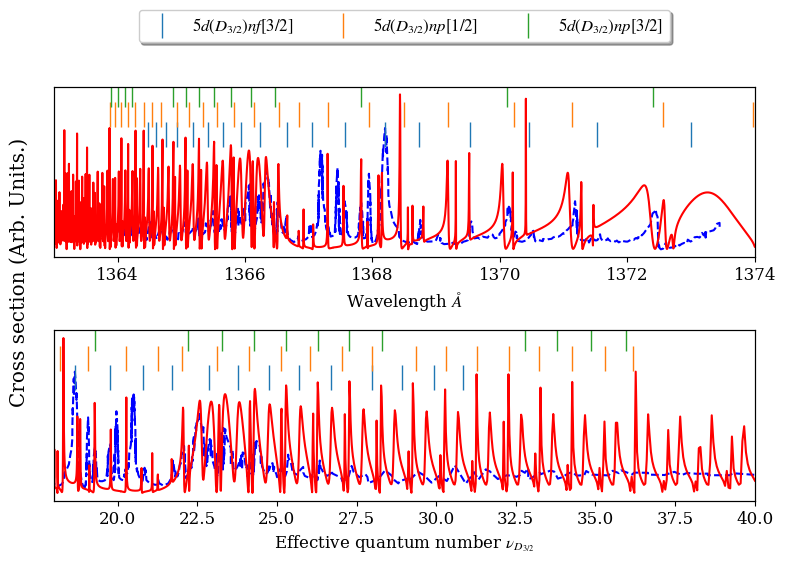

In [140]:
p1,p2,p3 = 0.7,0.8,0.9

fig, ax = plt.subplots(2,1,tight_layout=True,figsize=(8,6))

ms_marker = 18

ax[0].plot(exp[:,0],exp[:,1],'b--')
ax[0].plot(lines1[:,1],np.ones(len(lines1[:,1]))*p1,'|',ms=ms_marker,label='$5d(D_{3/2})nf[3/2]$')
ax[0].plot(lines3[:,1],np.ones(len(lines3[:,1]))*p2,'|',ms=ms_marker,label='$5d(D_{3/2})np[1/2]$')
ax[0].plot(lines3[:,2],np.ones(len(lines3[:,2]))*p3,'|',ms=ms_marker,label='$5d(D_{3/2})np[3/2]$')
ax2 = ax[0].twinx()
ax2.plot(etoA_fromeo(th[:,0],eo),th[:,1],'r')
#ax2.plot(etoA_fromeo(th[:,0],eo),c_th[::-1],'g')
ax[0].set_yticks([])
ax2.set_yticks([])
ax[0].set_xlabel('Wavelength $\\AA$')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(1363,1374)


ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['D32']),exp[:,1],'b--')
ax[1].plot(fnu(etoAU_fromA(lines1[:,1],egs),limits['D32']),np.ones(len(lines1[:,1]))*p1,'|',ms=ms_marker)
ax[1].plot(fnu(etoAU_fromA(lines3[:,1],egs),limits['D32']),np.ones(len(lines3[:,1]))*p2,'|',ms=ms_marker)
ax[1].plot(fnu(etoAU_fromA(lines3[:,2],egs),limits['D32']),np.ones(len(lines3[:,2]))*p3,'|',ms=ms_marker)
ax2 = ax[1].twinx()
ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D32']),th[:,1],'r')
ax[1].set_yticks([])
ax2.set_yticks([])
ax2.set_xlim(18,40)
ax[1].set_xlabel('Effective quantum number $\\nu_{D_{3/2}}$')

fig.supylabel('Cross section (Arb. Units.)')


(14.0, 30.0)

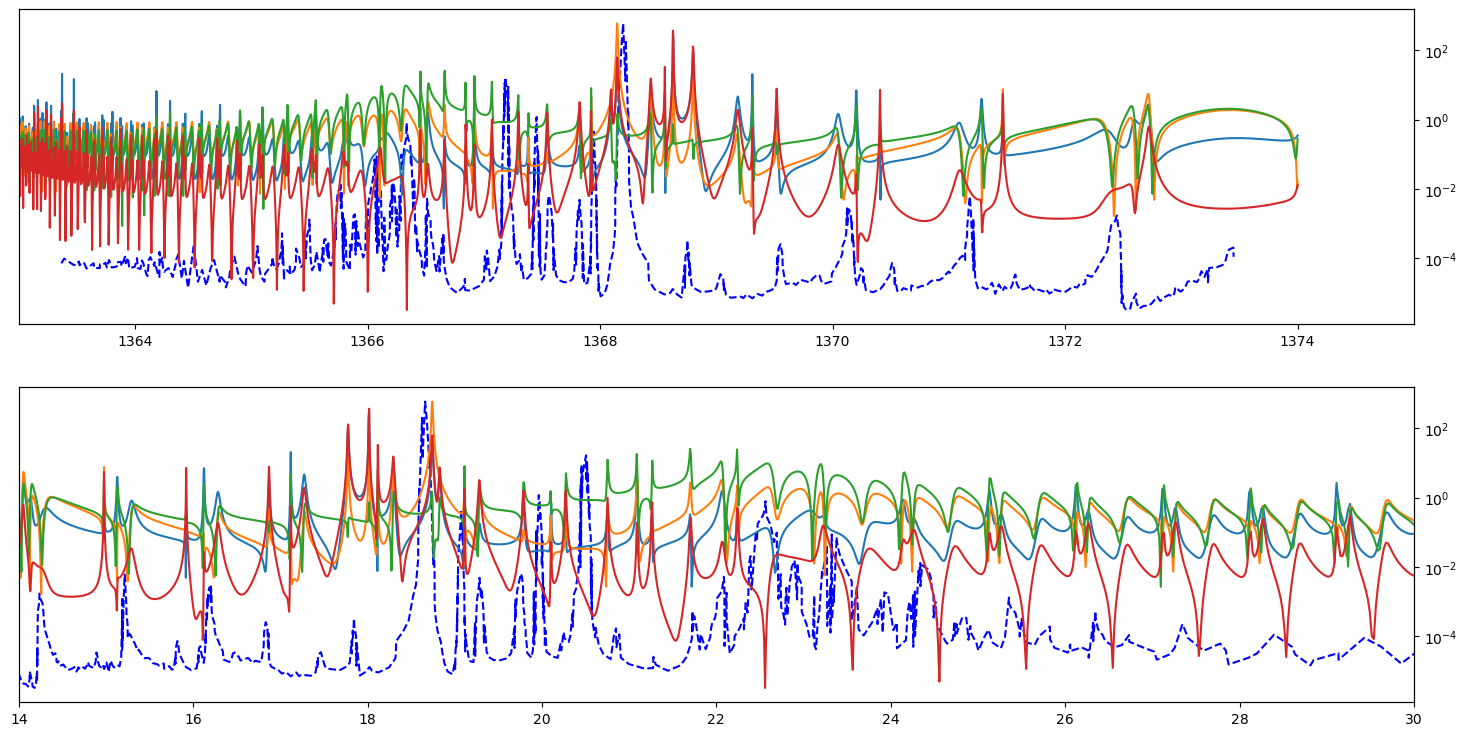

In [77]:
fig, ax = plt.subplots(2,1,figsize=(18,9))
ax[0].plot(exp[:,0],exp[:,1],'b--')
ax2 = ax[0].twinx()
for i in [3,4,7,9]:
    ax2.plot(etoA_fromeo(th[:,0],eo),[np.sum((np.abs(zco)**2)[i,:],axis=-1) for zco in Zco])
ax[0].set_yticks([])
ax2.set_yticks([])
ax2.set_xlim(1363,1375)
ax2.set_yscale('log')

ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['D32']),exp[:,1],'b--')
ax2 = ax[1].twinx()
for i in [3,4,7,9]:
    ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D32']),[np.sum((np.abs(zco)**2)[i,:]) for zco in Zco])
ax[1].set_yticks([])
ax2.set_yticks([])
ax2.set_yscale('log')
ax2.set_xlim(14,30)

## Fig 7

In [141]:
exp = np.loadtxt(exp_path+'fig7-5d-limit.csv')
th = np.loadtxt(th_path+'fig7_Xsect.OnePhotonJi0Jf1.Dat')
eo, ehi, ne = np.loadtxt(th_path+'fig7_Einputs.dat')

In [142]:
Kmlist= np.loadtxt(th_path+'fig7_kmatrix_jjstream_jf1.dat')
Zco = []
Zcok = []
for lines in Kmlist:
    opn, cls = opn_cls(lines[0],limits,lcsymb,jc)
    Kmat = KfromLin(len(lc),lines[1:])
    betas = np.array([ np.pi*(fnu(lines[0],limits[term_dict(lcsymb[i],jc[i])])-le[i])for i in cls])
    Zco.append(Zcoeffs(len(lc),Kmat,cls,opn,betas))
    Zcok.append(Umat[np.ix_(cls,cls)]@Zco[-1])

In [143]:
lines1 = np.loadtxt(exp_path+'5d52nf12_1')
lines3 = np.loadtxt(exp_path+'5d52np32_1')

Text(0.02, 0.5, 'Cross section (Arb. Units.)')

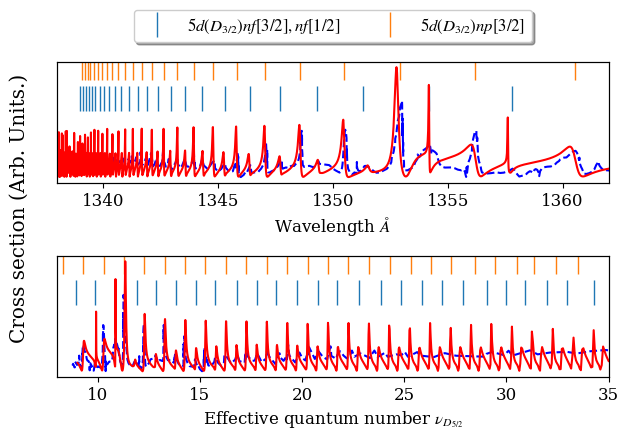

In [145]:
p1,p2,p3 = 0.7,0.8,0.9

fig, ax = plt.subplots(2,1,tight_layout=True)


ax[0].plot(exp[:,0],exp[:,1],'b--')
ax[0].plot(lines1[:,1],np.ones(len(lines1[:,1]))*p1,'|',ms=ms_marker,label='$5d(D_{5/2})nf[3/2],nf[1/2]$')
ax[0].plot(lines3[:,1],np.ones(len(lines3[:,1]))*p3,'|',ms=ms_marker,label='$5d(D_{5/2})np[3/2]$')
ax2 = ax[0].twinx()
ax2.plot(etoA_fromeo(th[:,0],eo),th[:,1],'r')
#ax2.plot(etoA_fromeo(th[:,0],eo),c_th[::-1],'g')
ax[0].set_yticks([])
ax2.set_yticks([])
ax[0].set_xlabel('Wavelength $\\AA$')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(1338,1362)


ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['D52']),exp[:,1],'b--')
ax[1].plot(fnu(etoAU_fromA(lines1[:,1],egs),limits['D52']),np.ones(len(lines1[:,1]))*p1,'|',ms=ms_marker)
ax[1].plot(fnu(etoAU_fromA(lines3[:,1],egs),limits['D52']),np.ones(len(lines3[:,1]))*p3,'|',ms=ms_marker)
ax2 = ax[1].twinx()
ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D52']),th[:,1],'r')
ax[1].set_yticks([])
ax2.set_yticks([])
ax2.set_xlim(8,35)
ax[1].set_xlabel('Effective quantum number $\\nu_{D_{5/2}}$')

fig.supylabel('Cross section (Arb. Units.)')


In [200]:
fig, ax = plt.subplots(2,1,figsize=(18,9))
ax[0].plot(exp[:,0],exp[:,1],'b--')
ax2 = ax[0].twinx()
for i in range(len(cls)):
    ax2.plot(etoA_fromeo(th[:,0],eo),[np.sum((np.abs(zco)**2)[i,:],axis=-1) for zco in Zco])
ax[0].set_yticks([])
ax2.set_yticks([])

ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['D52']),exp[:,1],'b--')
ax2 = ax[1].twinx()
for i in range(len(cls)):
    ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D52']),[np.sum((np.abs(zco)**2)[i,:]) for zco in Zco])
ax[1].set_yticks([])
ax2.set_yticks([])
ax2.set_xlim(10,20)
ax2.set_ylim(0,10)

(0.0, 10.0)

(0.0, 10.0)

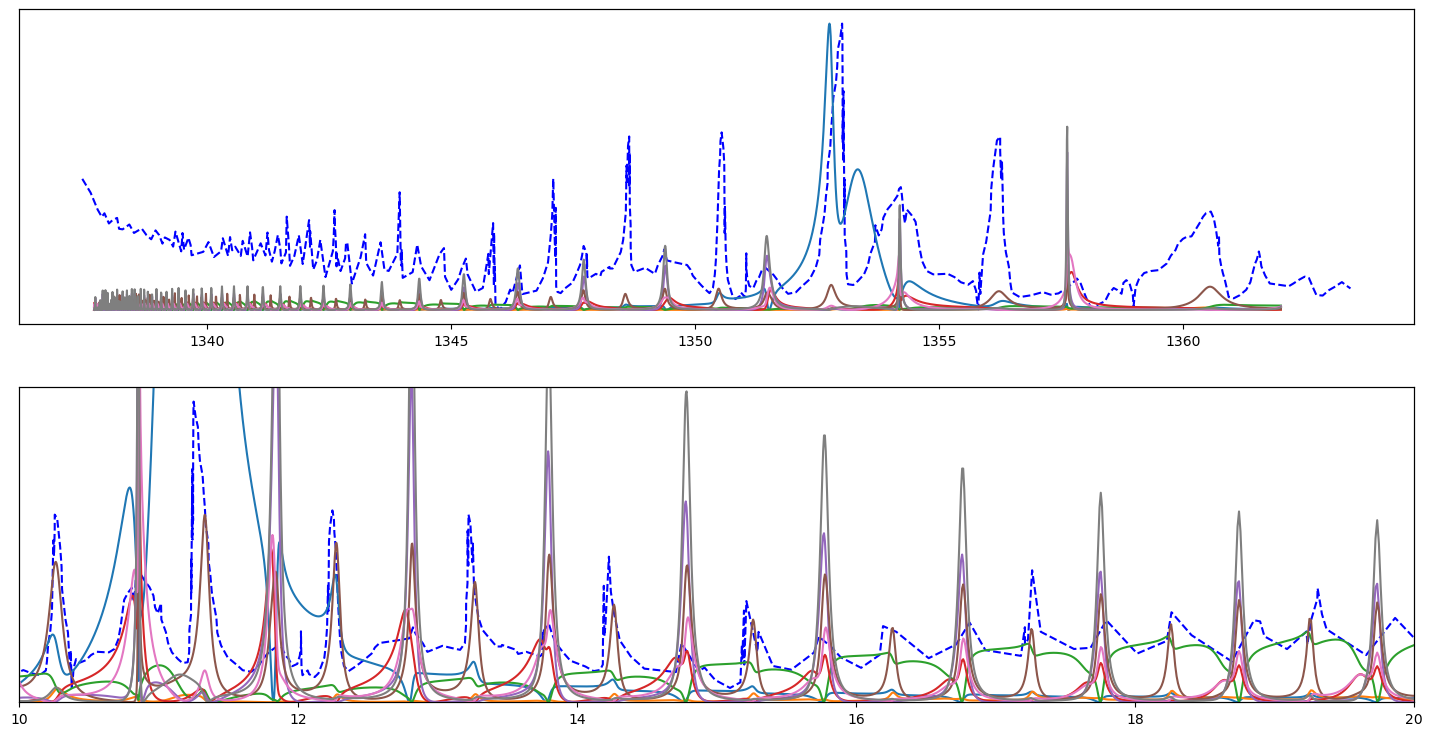

In [209]:
fig, ax = plt.subplots(2,1,figsize=(18,9))
ax[0].plot(exp[:,0],exp[:,1],'b--')
ax2 = ax[0].twinx()
for i in range(len(cls)):
    ax2.plot(etoA_fromeo(th[:,0],eo),[np.abs(np.sum((zco)[i,:],axis=-1))**2 for zco in Zcok])
ax[0].set_yticks([])
ax2.set_yticks([])

ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['D52']),exp[:,1],'b--')
ax2 = ax[1].twinx()
for i in range(len(cls)):
    ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D52']),[np.abs(np.sum((zco)[i,:],axis=-1))**2 for zco in Zcok])
ax[1].set_yticks([])
ax2.set_yticks([])
ax2.set_xlim(10,20)
ax2.set_ylim(0,10)

(0.0, 1.0)

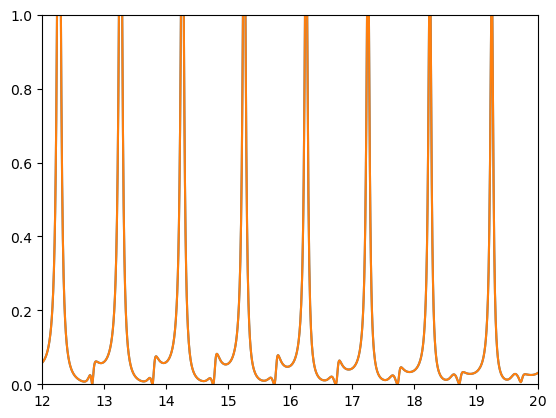

In [218]:
plt.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D52']),[np.abs((zco)[-3,0])**2 for zco in Zcok])
plt.plot(fnu(eAU_fromeo(th[:,0],eo),limits['D52']),[np.abs((zco)[-3,0])**2 for zco in Zco])
plt.xlim(12,20)
plt.ylim(0,1)

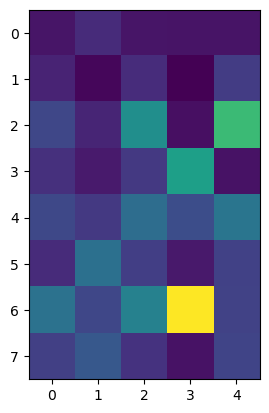

In [206]:
plt.imshow(np.abs(Zco[0]))

## Fig 8

In [146]:
exp = np.loadtxt(exp_path+'fig8-5d-limit.csv')
th = np.loadtxt(th_path+'fig8_Xsect.OnePhotonJi0Jf1.Dat')
eo, ehi, ne = np.loadtxt(th_path+'fig8_Einputs.dat')

In [147]:
etoAU_fromA(1345,egs),etoAU_fromA(1325,egs)

(-0.3386519646533876, -0.3335385912896652)

In [158]:
labels = np.loadtxt(exp_path+'labels_fig8.dat')

In [161]:
labels_txt = ["$6p(^2P_{3/2})9s[3/2]_1$","$4f^{13}(^2F_{5/2})7d[3/2]_1$",
          "$6p(^2P_{1/2})10d[3/2]_1$","$6p(^2P_{1/2})11s[1/2]_1$",
          "$4f^{13}(^2F_{5/2})7d[1/2]_1$"]

Text(0.5, 0, 'Effective quantum number $\\nu_{P_{3/2}}$')

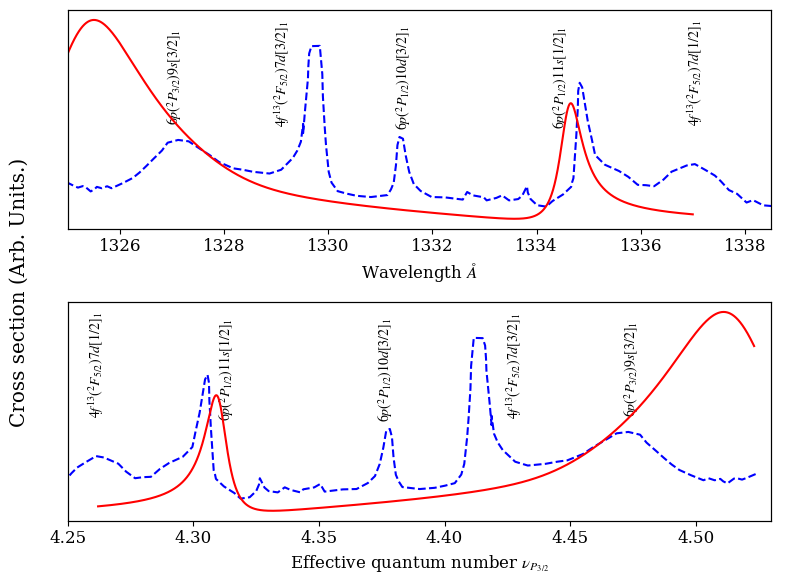

In [186]:
fig, ax = plt.subplots(2,1,figsize=(8,6),tight_layout=True)
ax[0].plot(exp[:,0],exp[:,1],'b--')
ax2 = ax[0].twinx()
ax2.plot(etoA_fromeo(th[:,0],eo),th[:,1],'r')
ax[0].set_ylim(0,1.2)
ax[0].set_yticks([])
ax[0].set_xlabel('Wavelength $\\AA$')

ax2.set_yticks([])

ax[0].set_xlim(1325,1338.5)

ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['P32']),exp[:,1],'b--')
ax2 = ax[1].twinx()
ax[1].set_ylim(0,1.2)
ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['P32']),th[:,1],'r')
ax[1].set_xlim(4.25,4.53)
ax[1].set_yticks([])
ax2.set_yticks([])

for i in range(len(labels)):
    ax[0].text(x=labels[i,0],y=labels[i,1],s=labels_txt[i],rotation=90,va='bottom',ha='center',fontsize=10)
for i in range(len(labels)):
    ax[1].text(x=fnu(etoAU_fromA(labels[i,0],egs),limits['P32'])
        ,y=labels[i,1],s=labels_txt[i],rotation=90,va='bottom',ha='center',fontsize=10)
fig.supylabel('Cross section (Arb. Units.)')
ax[1].set_xlabel('Effective quantum number $\\nu_{P_{3/2}}$')

ax3 = ax[2].twinx()

In [191]:
Kmlist = np.loadtxt(th_path+'fig8_kmatrix_jjstream_jf1.dat')
Zco = []
Zcok = []
for lines in Kmlist:
    opn, cls = opn_cls(lines[0],limits,lcsymb,jc)
    Kmat = KfromLin(len(lc),lines[1:])
    betas = np.array([ np.pi*(fnu(lines[0],limits[term_dict(lcsymb[i],jc[i])])-le[i])for i in cls])
    Zco.append(Zcoeffs(len(lc),Kmat,cls,opn,betas))
    Zcok.append(Zcoeffs(len(lc),np.conj(np.transpose(Umat))@Kmat@Umat,cls,opn,betas))

Text(0.5, 0, 'Effective quantum number $\\nu_{P_{3/2}}$')

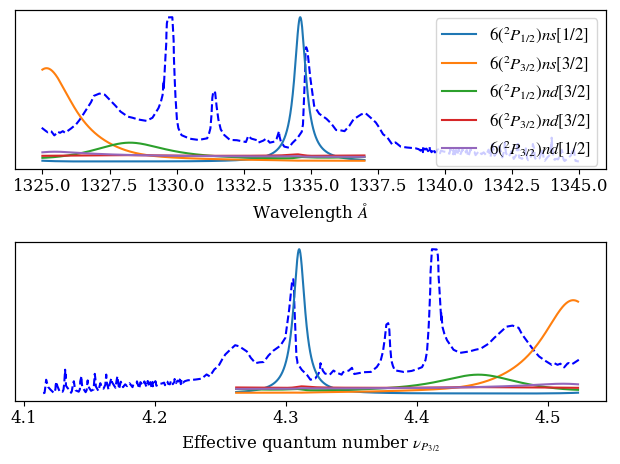

In [202]:
fig, ax = plt.subplots(2,1,tight_layout=True)
ax[0].plot(exp[:,0],exp[:,1],'b--')
ax2 = ax[0].twinx()
for i in range(len(cls)):
    ax2.plot(etoA_fromeo(th[:,0],eo),[np.sum((np.abs(zco)**2)[i,:],axis=-1) for zco in Zcok],label=chan_label[cls[i]])
ax[0].set_yticks([])
ax2.set_yticks([])
ax[0].set_xlabel('Wavelength $\\AA$')
ax2.legend(loc=0)
ax[1].plot(fnu(etoAU_fromA(exp[:,0],egs),limits['P32']),exp[:,1],'b--')

ax2 = ax[1].twinx()
for i in range(len(cls)):
    ax2.plot(fnu(eAU_fromeo(th[:,0],eo),limits['P32']),[np.sum((np.abs(zco)**2)[i,:],axis=-1) for zco in Zcok])
ax[1].set_yticks([])
ax2.set_yticks([])
ax[1].set_xlabel('Effective quantum number $\\nu_{P_{3/2}}$')


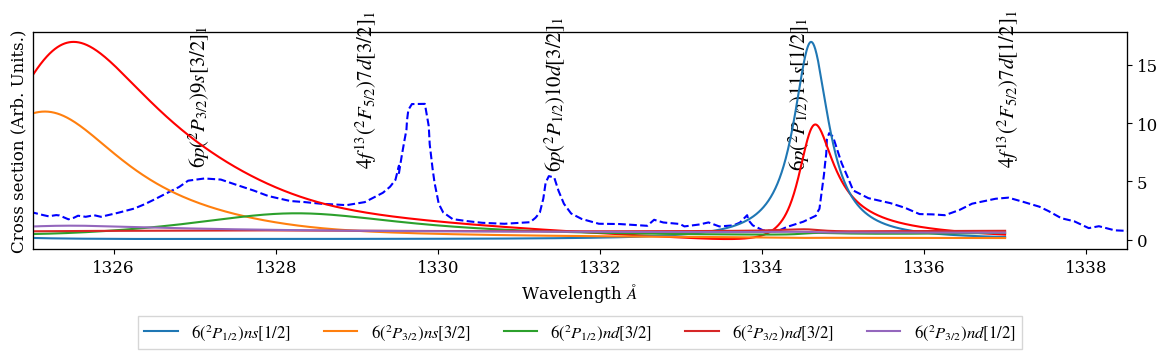

In [241]:
fig, ax = plt.subplots(1,1,figsize=(12,4),tight_layout=True)
ax.plot(exp[:,0],exp[:,1],'b--')
ax2 = ax.twinx()
ax2.plot(etoA_fromeo(th[:,0],eo),th[:,1],'r')
ax.set_ylim(0,1.5)
ax.set_yticks([])
ax.set_xlabel('Wavelength $\\AA$')

ax2.set_yticks([])

ax.set_xlim(1325,1338.5)


for i in range(len(labels)):
    ax.text(x=labels[i,0],y=labels[i,1],s=labels_txt[i],rotation=90,va='bottom',ha='center',fontsize=15)

ax.set_ylabel('Cross section (Arb. Units.)')


ax3 = ax.twinx()
for i in range(len(cls)):
    ax3.plot(etoA_fromeo(th[:,0],eo),[np.sum((np.abs(zco)**2)[i,:],axis=-1) for zco in Zcok],label=chan_label[cls[i]])

ax3.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),ncol=5, fancybox=False, shadow=False)

# Lu-Fano plots

## Even J=2 states

In [170]:
import pandas as pd
ayLims = {'S12':50443.20,'P32':80835.39,'P12':77504.98,'D32':22960.80+50443.20,'D52':24332.69+50443.20}
data_aymar = pd.read_csv('Data_Aymar_1980/6snd_D2',sep=' ')
levels = [int(list(split_text(aa))[-2]) for aa in data_aymar['Name']]
data_aymar['level']=levels

In [173]:
eo, ehi, ne, lst = np.loadtxt('J2_BS_e/Einputs.dat')
phs = np.loadtxt('J2_BS_e/Chan_EliminationJi1Jf2.dat')

Text(0.02, 0.5, '$\\nu_{6s}$ mod(1)')

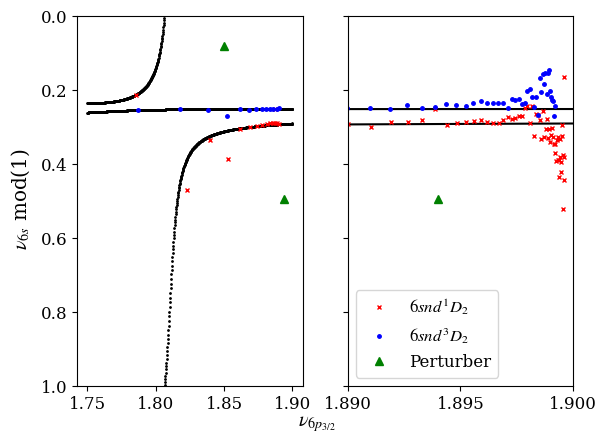

In [177]:
fig,ax = plt.subplots(1,2,sharey=True)
p1 = data_aymar[np.array(data_aymar['Sym']=='1D2',dtype=bool) * np.array(data_aymar['level']<=21,dtype=bool)]
p2 = data_aymar[np.array(data_aymar['Sym']=='3D2',dtype=bool) * np.array(data_aymar['level']<=21,dtype=bool)]
p3 = data_aymar[list(data_aymar['Sym']=='A')]
p4 = data_aymar[list(data_aymar['Sym']=='B')]


ax[0].plot(fnu(phs[:,0],limits['P32']),np.mod(-phs[:,1],1),'ko',ms=1)
ax[0].plot(fnu(phs[:,0],limits['P32']),np.mod(-phs[:,2],1),'ko',ms=1)

ax[0].plot(fnu(p1['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p1['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'rx',ms=2.5)

ax[0].plot(fnu(p2['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p2['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'bo',ms=2.5)

ax[0].plot(fnu(p3['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p3['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^')

ax[0].plot(fnu(p4['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p4['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^')


ax[0].set_ylim(1,0)
ax[0].set_xlim()

p1 = data_aymar[np.array(data_aymar['Sym']=='1D2',dtype=bool) * np.array(data_aymar['level']>=21,dtype=bool)]
p2 = data_aymar[np.array(data_aymar['Sym']=='3D2',dtype=bool) * np.array(data_aymar['level']>=21,dtype=bool)]
ax[1].plot(fnu(phs[:,0],limits['P32']),np.mod(-phs[:,1],1),'k-',ms=1)
ax[1].plot(fnu(phs[:,0],limits['P32']),np.mod(-phs[:,2],1),'k-',ms=1)

ax[1].plot(fnu(p1['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p1['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'rx',ms=2.5,label='$6snd ^1D_2$')

ax[1].plot(fnu(p2['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p2['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'bo',ms=2.5,label='$6snd ^3D_2$')

ax[1].plot(fnu(p3['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p3['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^',label='Perturber')

ax[1].plot(fnu(p4['Energy']/CMperAU,ayLims['P32']/CMperAU),
         np.mod(fnu(p4['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^')


ax[1].legend(loc=0)
ax[1].set_ylim(1,0)
ax[1].set_xlim(1.89,1.9)
fig.supxlabel('$\\nu_{6p_{3/2}}$')
fig.supylabel('$\\nu_{6s}$ mod(1)')

# J=1 odd

In [179]:
data_aymar = pd.read_csv('Data_Aymar_1980/6snp_P1',sep=' ')
levels = [int(list(split_text(aa))[-2]) for aa in data_aymar['Name']]
data_aymar['level']=levels

In [180]:
eo, ehi, ne, lst = np.loadtxt('J1_BS_o/Einputs.dat')
phs = np.loadtxt('J1_BS_o/Chan_EliminationJi0Jf1.dat')

Text(0.02, 0.5, '$\\nu_{6s}$ mod(1)')

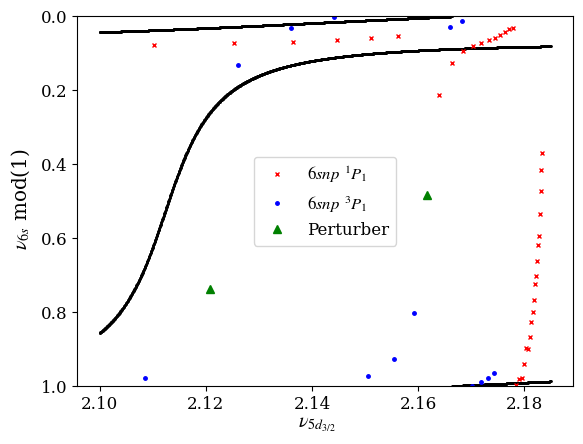

In [181]:
fig,ax = plt.subplots(1,1,sharey=True)
p1 = data_aymar[np.array(data_aymar['Sym']=='1P1',dtype=bool) ]
p2 = data_aymar[np.array(data_aymar['Sym']=='3P1',dtype=bool) ]
p3 = data_aymar[list(data_aymar['Sym']=='A')]
p4 = data_aymar[list(data_aymar['Sym']=='B')]
ax.plot(fnu(phs[:,0],limits['D32']),np.mod(-phs[:,1],1),'ko',ms=1.)
ax.plot(fnu(phs[:,0],limits['D32']),np.mod(-phs[:,2],1),'ko',ms=1.)

ax.plot(fnu(p1['Energy']/CMperAU,(1*ayLims['D32'])/CMperAU),
         np.mod(fnu(p1['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'rx',ms=2.5,label='$6snp$ $^1P_1$')

ax.plot(fnu(p2['Energy']/CMperAU,(1*ayLims['D32'])/CMperAU),
         np.mod(fnu(p2['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'bo',ms=2.5,label='$6snp$ $^3P_1$')

ax.plot(fnu(p3['Energy']/CMperAU,(1*ayLims['D32'])/CMperAU),
         np.mod(fnu(p3['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^',label='Perturber')

ax.plot(fnu(p4['Energy']/CMperAU,(1*ayLims['D32'])/CMperAU),
         np.mod(fnu(p4['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^')


ax.legend(loc=0)
ax.set_ylim(1,0)
fig.supxlabel('$\\nu_{5d_{3/2}}$')
fig.supylabel('$\\nu_{6s}$ mod(1)')

# J=0 even


In [183]:
data_aymar = pd.read_csv('Data_Aymar_1980/6sns_1S0',sep=' ')
levels = [int(list(split_text(aa))[-2]) for aa in data_aymar['Name']]
data_aymar['level']=levels

In [184]:
eo, ehi, ne, lst = np.loadtxt('J0_BS_e/Einputs.dat')
phs = np.loadtxt('J0_BS_e/Chan_EliminationJi1Jf0.dat')

Text(0.02, 0.5, '$\\nu_{6s}$ mod(1)')

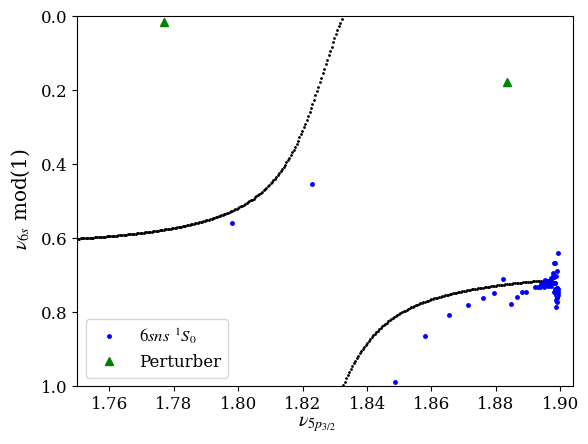

In [189]:
fig,ax = plt.subplots(1,1,sharey=True)
p1 = data_aymar[np.array(data_aymar['Sym']=='S12',dtype=bool) ]
p2 = data_aymar[np.array(data_aymar['Sym']=='S12',dtype=bool) ]
p3 = data_aymar[list(data_aymar['Sym']=='A')]
p4 = data_aymar[list(data_aymar['Sym']=='B')]

ax.plot(fnu(phs[:,0],limits['P32']),np.mod(-phs[:,1],1),'ko',ms=1.)

ax.plot(fnu(p2['Energy']/CMperAU,(1*ayLims['P32'])/CMperAU),
         np.mod(fnu(p2['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'bo',ms=2.5,label='$6sns$ $^1S_0$')

ax.plot(fnu(p3['Energy']/CMperAU,(1*ayLims['P32'])/CMperAU),
         np.mod(fnu(p3['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^',label='Perturber')

ax.plot(fnu(p4['Energy']/CMperAU,(1*ayLims['P32'])/CMperAU),
         np.mod(fnu(p4['Energy']/CMperAU,ayLims['S12']/CMperAU),1),'g^')



ax.set_ylim(1,0)
ax.set_xlim(1.75,1.904)
ax.legend(loc=3)
fig.supxlabel('$\\nu_{5p_{3/2}}$')
fig.supylabel('$\\nu_{6s}$ mod(1)')
